<a href="https://colab.research.google.com/github/geniusevil/geniusevil/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Python Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Time - > The number of seconds elapsed between first transaction and current transaction.

V1-V28 - > These are the principal components obtained with PCA , due to confidentiality issues original features are not provided in the given dataset

Amount - > Transaction Amount

Class - > For determining whether a transaction is Fraudulent or Legit

1 - > Fraudulent Transaction

0 - > Legit Transaction



Loading the dataset into the Pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 df = pd.read_csv('/content/drive/MyDrive/Datasets/credit_data.csv')
#df = pd.read_csv('credit_data.csv')

Printing the First 5 rows of the dataframe

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape # This gives us the number of rows and number of columns in the dataframe

(284807, 31)

Printing the Last 5 rows of the dataframe

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Knowing the information of the dataset

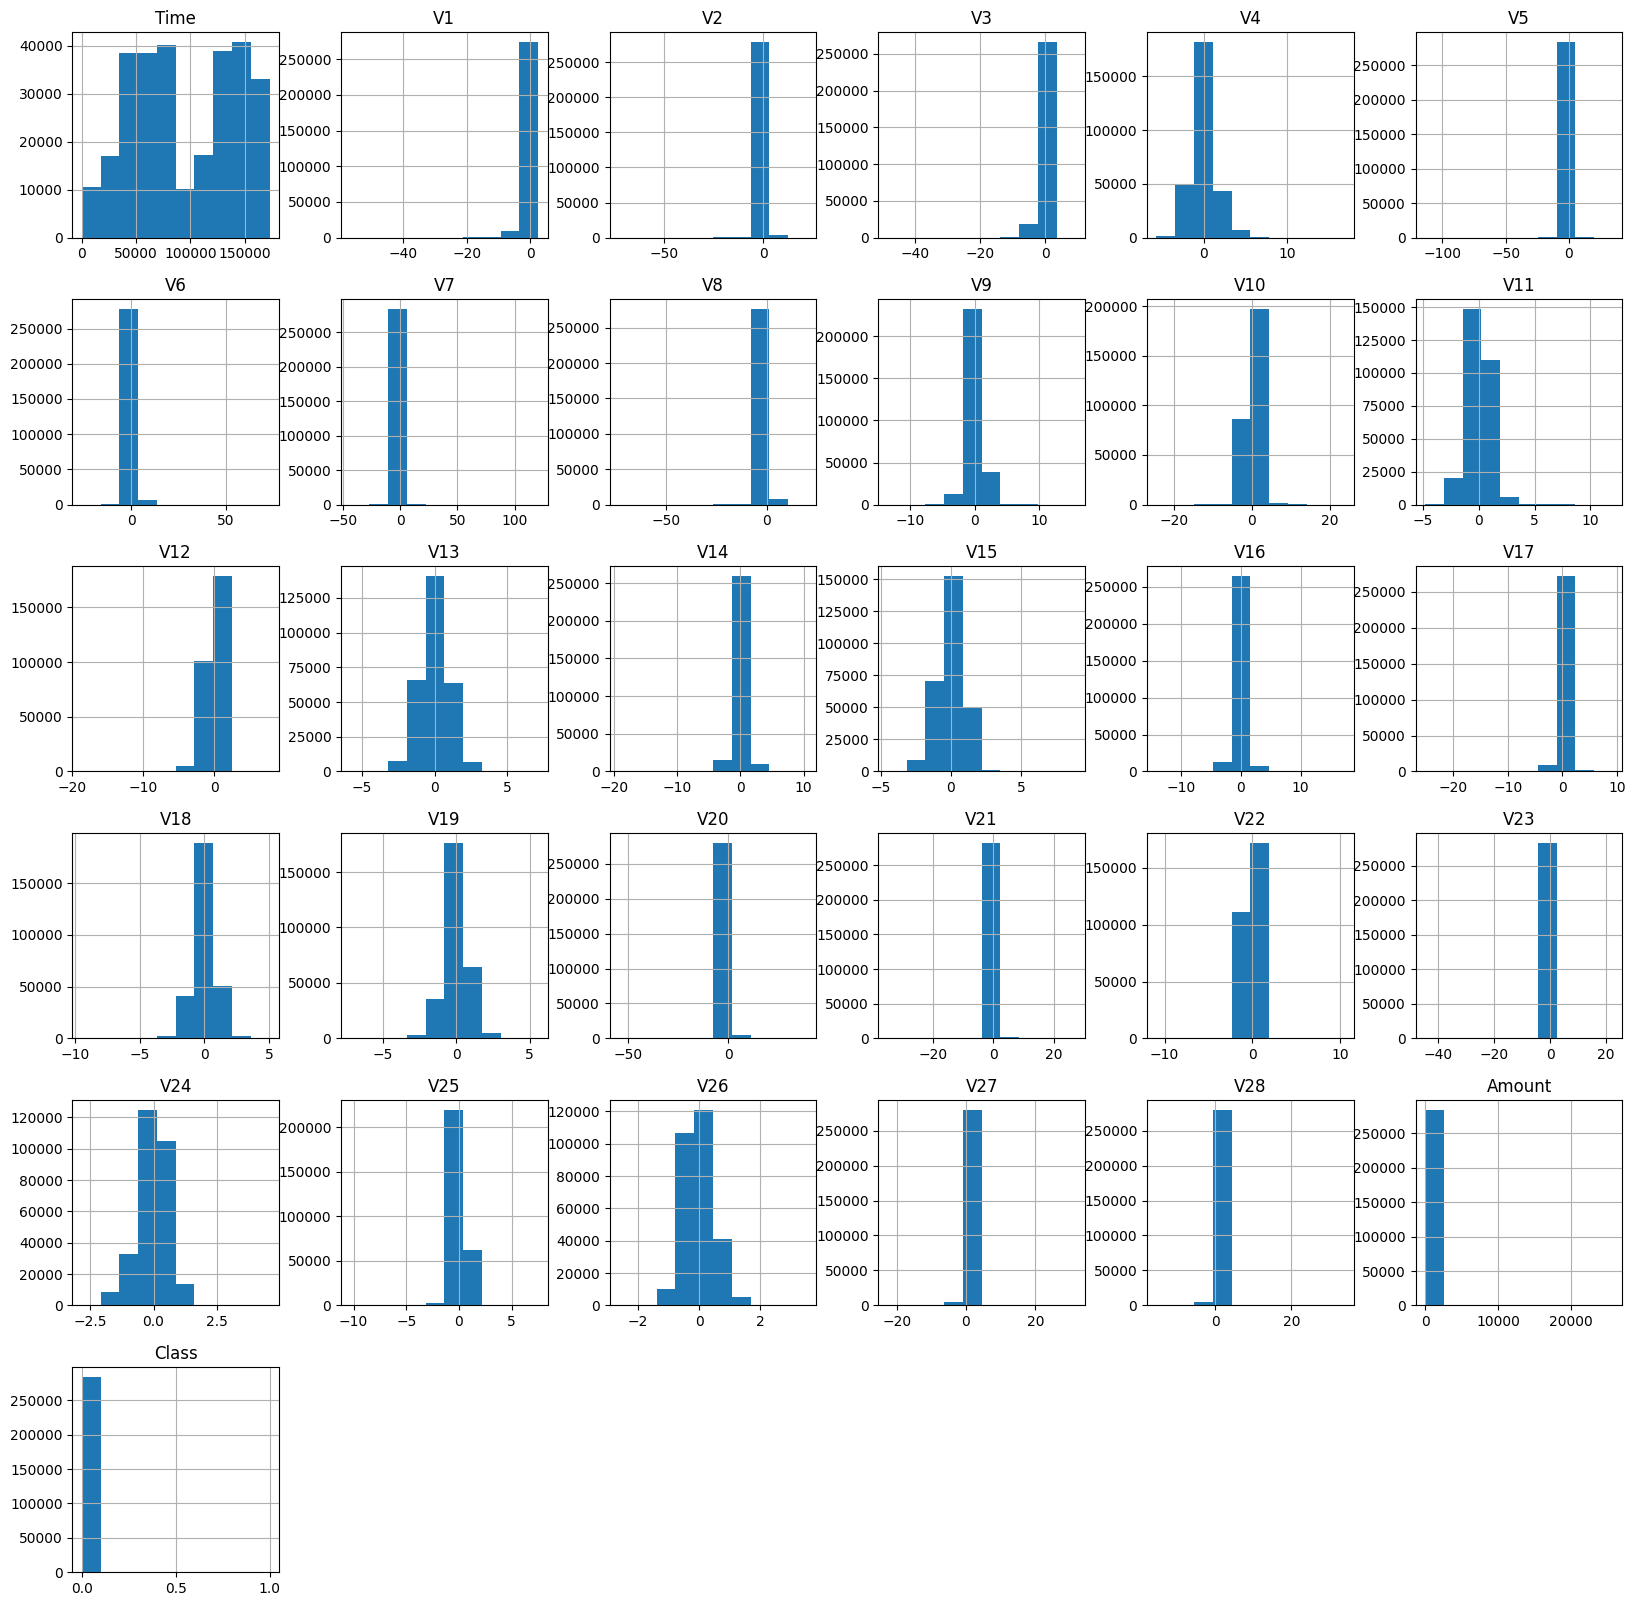

In [ ]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

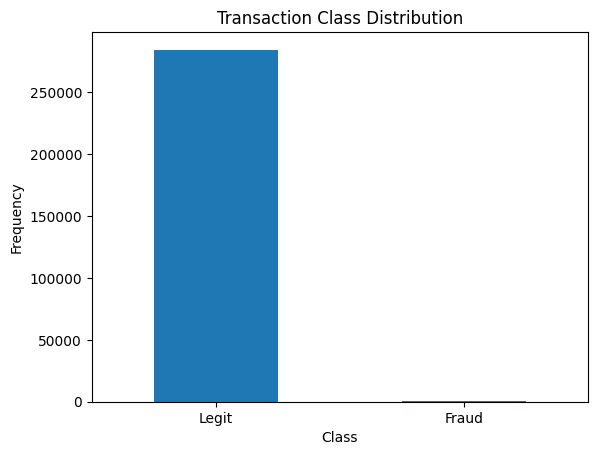

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ["Legit", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Finding whether there are any missing values present in the dataset

In [ ]:
df.isnull().sum()  # as we can see there are no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Calculating how many legit and fradulent transactions have taken place

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

By this we can say that this is highly unbalanced dataset

Now We are seperating the Legit Transactions and Fradulent Transactions

In [ ]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [ ]:
legit.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

Finding the Statistical Measures of the Legit and Fraud Transactions

In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As we can Observe that the Mean of Fradulent is more than Legit

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


There is a large difference between values of normal transaction and fraud transaction

As we know that this is highly unbalanced dataset , we use under-sampling technique to balance the dataset

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
print(legit_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [ ]:
# Now both the legit and fraud transactions are Balanced,so we merge the both into a single dataframe
new_df = pd.concat([legit_sample,fraud],axis =0)

In [ ]:
new_df.shape

(984, 31)

In [ ]:
correlation = new_df.corr()

In [ ]:
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.227288,-0.199415,0.129000,-0.187421,0.272832,0.113298,0.203378,-0.139558,0.125272,...,-0.058481,0.128871,0.048891,-0.040103,-0.187716,-0.052538,-0.135955,0.009281,0.011177,-0.107841
V1,0.227288,1.000000,-0.813085,0.882497,-0.608006,0.865108,0.318857,0.878458,-0.084028,0.644668,...,0.016006,-0.032626,-0.044334,-0.063999,-0.075759,0.051410,0.193624,0.189565,-0.021419,-0.434044
V2,-0.199415,-0.813085,1.000000,-0.860218,0.675526,-0.783885,-0.294384,-0.845715,-0.020350,-0.684129,...,0.033188,-0.001219,0.168641,0.000279,0.126078,-0.002998,-0.149488,-0.006334,-0.260015,0.493864
V3,0.129000,0.882497,-0.860218,1.000000,-0.769805,0.850347,0.462303,0.882014,-0.170074,0.751790,...,0.027493,-0.061892,-0.034375,0.039225,-0.085646,-0.005300,0.106029,0.130740,-0.002281,-0.571936
V4,-0.187421,-0.608006,0.675526,-0.769805,1.000000,-0.568325,-0.417102,-0.705185,0.101885,-0.782867,...,-0.018370,0.109057,0.024980,-0.088774,-0.025458,0.137694,-0.027955,-0.073968,-0.003422,0.702410
V5,0.272832,0.865108,-0.783885,0.850347,-0.568325,1.000000,0.272356,0.826818,-0.204836,0.643766,...,0.048366,-0.092182,-0.090239,-0.138342,-0.094588,0.059428,0.190566,0.179660,-0.116323,-0.359945
V6,0.113298,0.318857,-0.294384,0.462303,-0.417102,0.272356,1.000000,0.301567,-0.577772,0.353019,...,0.027201,0.014741,0.312494,-0.027950,-0.135367,-0.036651,-0.159729,-0.020777,0.229071,-0.395870
V7,0.203378,0.878458,-0.845715,0.882014,-0.705185,0.826818,0.301567,1.000000,0.085142,0.753335,...,0.038505,-0.115528,-0.097873,-0.027683,0.049418,0.020286,0.247365,0.158112,0.158155,-0.478994
V8,-0.139558,-0.084028,-0.020350,-0.170074,0.101885,-0.204836,-0.577772,0.085142,1.000000,-0.073530,...,-0.113656,0.030162,-0.420828,0.077331,0.225697,0.044465,0.293598,-0.014446,0.011632,0.054559
V9,0.125272,0.644668,-0.684129,0.751790,-0.782867,0.643766,0.353019,0.753335,-0.073530,1.000000,...,0.150921,-0.229341,-0.070633,0.024283,0.017819,-0.132259,0.145555,0.151623,0.042555,-0.554243


<Axes: >

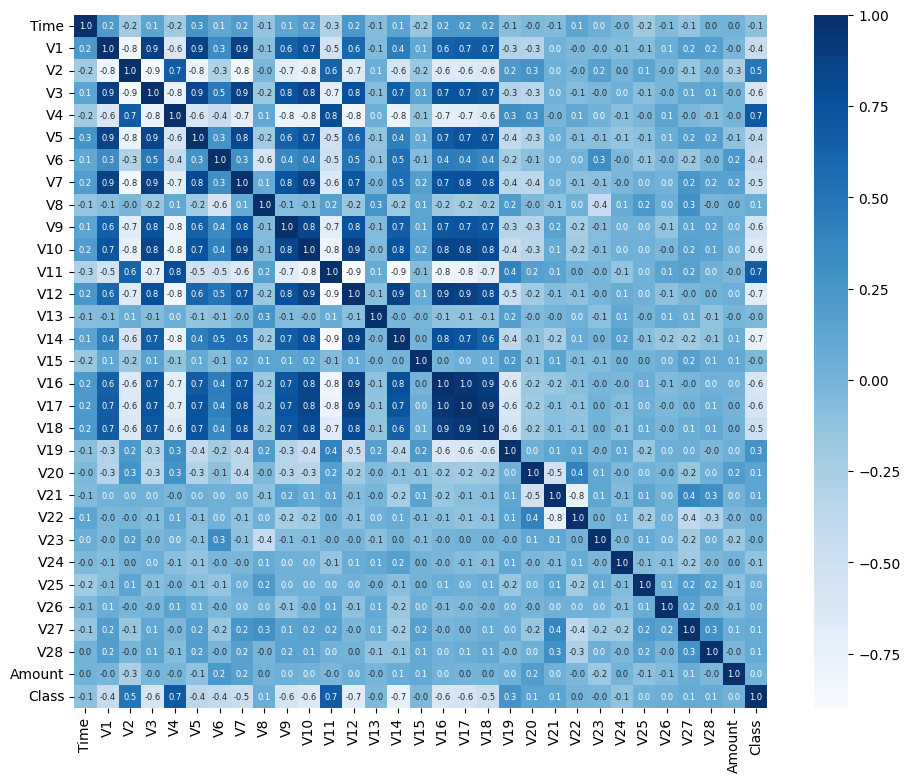

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':6},cmap='Blues')
#Correlation Matrix
# fig = plt.figure(figsize=(12,9))
# sns.heatmap(correlation,vmax=0.8,square = True)
# plt.show()

In [ ]:
new_df.head()

In [ ]:
new_df.tail()

In [ ]:
new_df.groupby('Class').mean()

In [ ]:
# Even though we have done under-sampling the values of legit transactions greatly vary from fraud transactions

Splitting the data into features and targets

In [ ]:
X = new_df.drop(columns = 'Class',axis=1)
Y = new_df['Class']

In [ ]:
print(X.shape)
print(Y.shape)

Splitting the data into training data and testing data

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

The stratify is used to evenly distribute the class values in Y.

If we dont use stratify there might be a chance that most of 1's goes into training data and most of 0's go into testing data or converse

By using stratify it evenly distributes 1's and 0's in training and testing data


Applying the Logistic Regression model

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))
# That means this model can predict 94% of the transactions which are legit and which are fraud

In [ ]:
# Accuracy of training data
X_train_pred = model.predict(X_train)
train_acc = accuracy_score(X_train_pred,Y_train)
print(train_acc)

In [ ]:
# Accuracy of testing data
X_test_pred = model.predict(X_test)
test_acc = accuracy_score(X_test_pred,Y_test)
print(test_acc)

In [ ]:
# X = df.drop(columns='Class',axis=1)
# Y = df['Class']

In [ ]:
# print(X.shape)
# print(Y.shape)

In [ ]:
# X_train , X_test ,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,stratify=Y,random_state=20)
# model = LogisticRegression()
# model.fit(X_train,Y_train)
# model.score(X_test,Y_test)

We are getting around 99% accuracy but this may not be the best approach.

While it is true that undersampling can reduce the size of the dataset and make the training process more computationally expensive, it can also help to improve the performance of the model by making it more sensitive to fraudulent transactions.

this is because undersampling reduce no of legit transaction which can help to prevent model from becoming overly confident in its predictions.





Finding accuracy scores of other ML models to know which is performing better

## Confusion matrix

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Create a confusion matrix
confusion_matrix = confusion_matrix(Y_test, predictions)

# Print the confusion matrix
print(confusion_matrix)

[[92  7]
 [10 88]]


In [ ]:
TP = confusion_matrix[0, 0]
TN = confusion_matrix[1, 1]
FP = confusion_matrix[1, 0]
FN = confusion_matrix[0, 1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (TP + FN)

print("\nTrue Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)


True Positive Rate (TPR): 0.9292929292929293
True Negative Rate (TNR): 0.8979591836734694
False Positive Rate (FPR): 0.10204081632653061
False Negative Rate (FNR): 0.0707070707070707


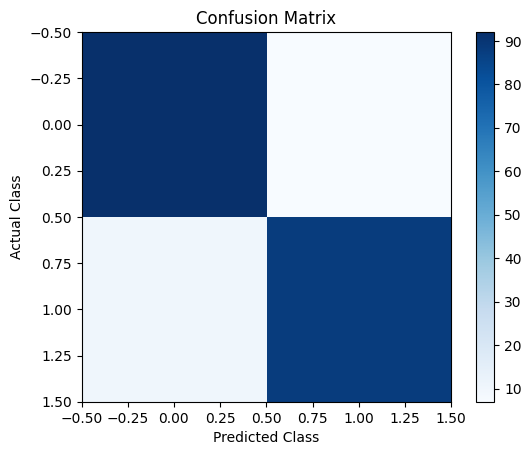

In [ ]:
# Create a heatmap of the confusion matrix
plt.imshow(confusion_matrix, cmap='Blues')

# Add labels and title
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')

# Show the heatmap
plt.show()